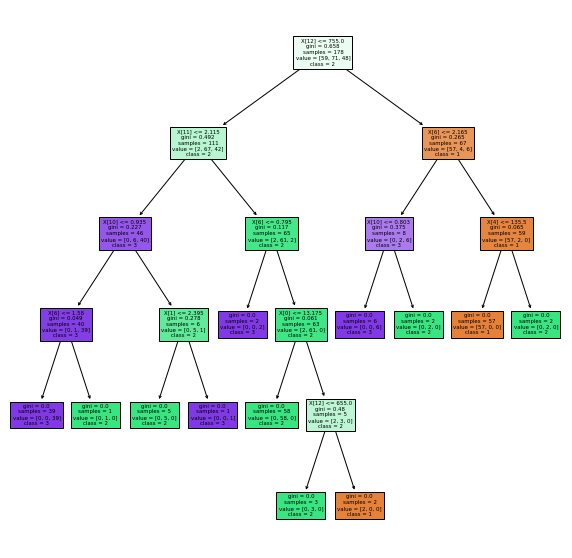

Accuracy of tree:  1.0
Test score after c-v: 0.8931746031746031


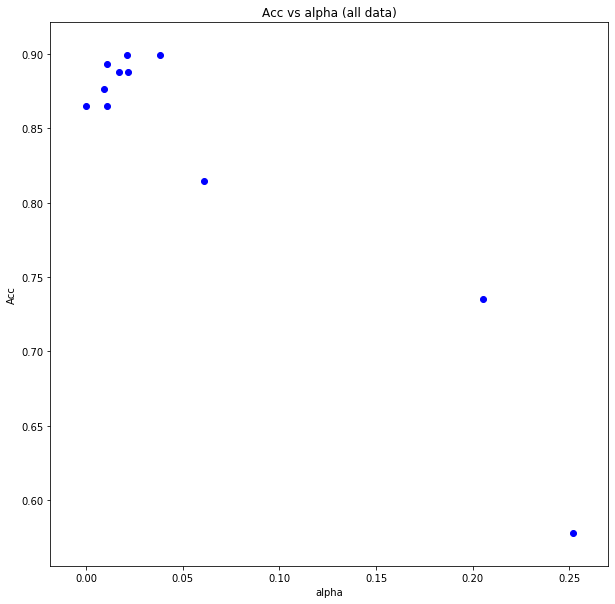

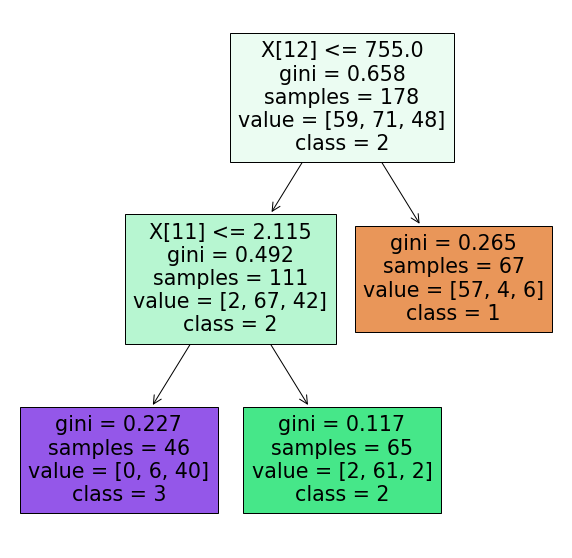

Accuracy of optimal tree:  0.8876404494382022
Test score after c-v: 0.8147619047619047


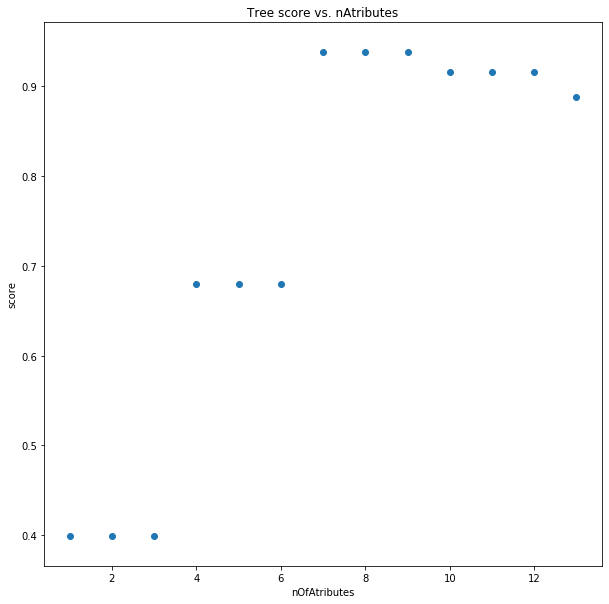

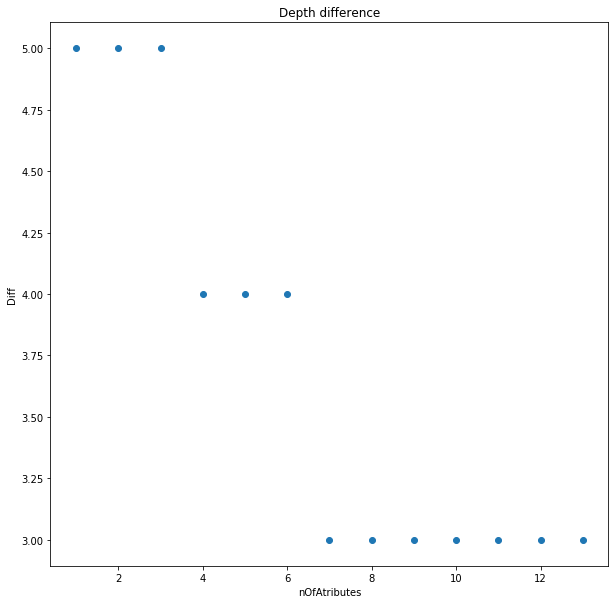

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as num
import pandas as pan
import math
import sklearn.tree as skt
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pydotplus
from IPython.display import Image
from sklearn import tree
import operator

#Wczytanie danych
data = pan.read_csv('C:\\Users\\PYTON\\Desktop\\git_repo\\lsed\\zad2\\wine.data', sep=',', header=None, engine='python')
data.columns = ["class", "Alcohol", "Malic acid", "Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
X = data.iloc[:,1:14]

#Tworzenie drzewa i początkowe fitowanie danych
clf = DecisionTreeClassifier()
clf.fit(X, data['class'])

#Plotowanie pierwszego drzewa
plt.figure(figsize=(10,10))
#feature_names=["Alcohol", "Malic acid", "Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
plot_tree(clf, filled=True, class_names=['1','2','3'])
plt.show()

#powtórne podstawienie
clf.predict(X)
print("Accuracy of tree: ",clf.score(X, data['class']))

#Cross-validation
cv_results = cross_validate(clf, X, data['class'], cv=5)
print("Test score after c-v:", cv_results['test_score'].mean())

#głębogość drzewa pełnego
tree_depth = clf.get_depth()

#Wybieranie optymalnego drzewa
ccp_path = clf.cost_complexity_pruning_path(X, data['class'])
alphas = ccp_path.ccp_alphas
imp = ccp_path.impurities

err = []
acc = []
for alpha in alphas:
    tree_tmp = tree.DecisionTreeClassifier(ccp_alpha=alpha)
    cv_results = cross_validate(tree_tmp, X, data['class'], cv=5)
    acc.append(cv_results['test_score'].mean())
    err.append(num.std(cv_results['test_score']))

plt.figure(figsize=(10,10))
plt.scatter(alphas, acc, c="blue",label="")
plt.title('Acc vs alpha (all data)')
plt.ylabel('Acc')
plt.xlabel('alpha')
plt.show()

#wyberanie najlepszego alpha - wziac najwyzsza wartosc acc razem z niepewnosciami i znalezc najwieksze alpha w przedziale tych niepewnosci
acc_index, acc_value = max(enumerate(acc), key=operator.itemgetter(1))
acc_min = acc_value - err[acc_index]
optimal_index = 0
i = 0
for ac in acc:
    i+=1
    if(ac > acc_min):
        optimal_index = i

#tworzenie optymalnego drzewa
best_clf = tree.DecisionTreeClassifier(ccp_alpha=alphas[optimal_index])
best_clf.fit(X, data['class'])
plt.figure(figsize=(10,10))
plot_tree(best_clf, filled=True, class_names=['1','2','3'])
plt.show()

#powtórne podstawienie
best_clf.predict(X)
print("Accuracy of optimal tree: ",best_clf.score(X, data['class']))

#Cross-validation
cv_results = cross_validate(best_clf, X, data['class'], cv=5)
print("Test score after c-v:", cv_results['test_score'].mean())

acc_of_tree = []
depth_diff = []

iter = 0 
for index in enumerate(X.columns, 1):
    #print(index[0])
    iter = index[0] + 1
    X = data.iloc[:,1:iter]
    
    ccp_path = clf.cost_complexity_pruning_path(X, data['class'])
    alphas = ccp_path.ccp_alphas
    imp = ccp_path.impurities

    err = []
    acc = []
    for alpha in alphas:
        tree_tmp = tree.DecisionTreeClassifier(ccp_alpha=alpha)
        cv_results = cross_validate(tree_tmp, X, data['class'], cv=5)
        acc.append(cv_results['test_score'].mean())
        err.append(num.std(cv_results['test_score']))
    #wyberanie najlepszego alpha - wziac najwyzsza wartosc acc razem z niepewnosciami i znalezc najwieksze alpha w przedziale tych niepewnosci
    acc_index, acc_value = max(enumerate(acc), key=operator.itemgetter(1))
    acc_min = acc_value - err[acc_index]
    optimal_index = 0
    i = 0
    for ac in acc:
        i+=1
        if(ac > acc_min):
            optimal_index = i
    #tworzenie optymalnego drzewa
    best_clf = tree.DecisionTreeClassifier(ccp_alpha=alphas[optimal_index])
    best_clf.fit(X, data['class'])

    depth_diff.append(tree_depth - best_clf.get_depth())

    #powtórne podstawienie
    best_clf.predict(X)
    #print("Accuracy of optimal tree: ",best_clf.score(X, data['class']))
    acc_of_tree.append(best_clf.score(X, data['class']))
    #Cross-validation
    cv_results = cross_validate(best_clf, X, data['class'], cv=5)
    #print("Test score after c-v:", cv_results['test_score'].mean())

#print(acc_of_tree)

plt.figure(figsize=(10, 10))
plt.title('Tree score vs. nAtributes')
plt.xlabel('nOfAtributes')
plt.ylabel('score')
plt.scatter(range(1, 14, 1), acc_of_tree)
plt.show()

plt.figure(figsize=(10, 10))
plt.title('Depth difference')
plt.xlabel('nOfAtributes')
plt.ylabel('Diff')
plt.scatter(range(1, 14, 1), depth_diff)
plt.show()